In [1]:
# global definitions

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca

import numpy as np

# FranceOwn
#party_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/france_own/FranceOwn_group_attitudes.csv'
#attr_preffix = 'ches'

# Germany
party_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/germany/Germany_group_attitudes.csv'
attr_preffix = 'ches'

# ItalyOwn
#party_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/italy_own/ItalyOwn_group_attitudes.csv'
#attr_preffix = 'ches'

# Spain
#party_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/spain/Spain_group_attitudes.csv'
#attr_preffix = 'ches'

# UKOwn
#party_attitudes_file = '/home/foula/linate/plos_asonam_exp_data/uk_own/UKOwn_group_attitudes.csv'
#attr_preffix = 'ches'

In [2]:
# load party attitudes

party_attitudes_df = pd.read_csv(party_attitudes_file)
cols = []
for c in party_attitudes_df.columns:
    if c.startswith(attr_preffix):
        cols.append(c)
cols.insert(0, 'party')
party_attitudes_df = party_attitudes_df[cols]
party_attitudes_df.dropna(inplace = True)
party_attitudes_df.head()

,party,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_dissent,ches2019_eu_blur,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,...,ches2019_nationalism,ches2019_urban_rural,ches2019_protectionism,ches2019_regions,ches2019_russian_interference,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_antielite_salience,ches2019_corrupt_salience,ches2019_members_vs_leadership
0,CDU/CSU,6.285714,0.560612,6.857143,2.636364,3.555556,5.2500,4.647059,6.473684,4.055555,...,5.473684,6.100000,3.388889,4.000000,2.647059,2.882353,1.70,0.75,1.368421,8.315789
1,SPD,6.523809,0.511766,6.857143,2.363636,2.777778,5.4375,5.294117,5.947369,4.888889,...,3.421053,3.368421,4.222222,5.466667,2.764706,1.647059,2.45,1.35,1.526316,5.578947
2,The Left Party,4.714286,0.956183,4.850000,5.090909,4.666666,5.2000,3.000000,3.263158,3.562500,...,2.894737,3.166667,6.222222,5.307692,2.235294,1.625000,4.35,4.45,2.368421,6.055555
3,Alliance 90/The Greens,6.761905,0.538958,7.333334,1.454546,1.888889,5.8000,5.687500,6.166666,5.470588,...,1.105263,2.000000,3.882353,4.153846,2.176471,1.117647,4.90,1.80,2.473684,4.842105
5,CDU,6.285714,0.560612,6.857143,2.636364,3.555556,5.2500,4.647059,6.473684,4.055555,...,5.473684,6.100000,3.388889,4.000000,2.647059,2.882353,1.70,0.75,1.368421,8.315789


### Feature importance based with PCA

In [3]:
# Initialize

model = pca()

r_cols = cols.copy()
r_cols.remove('party')
# Fit transform
out = model.fit_transform(party_attitudes_df[r_cols])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [48] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [48] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


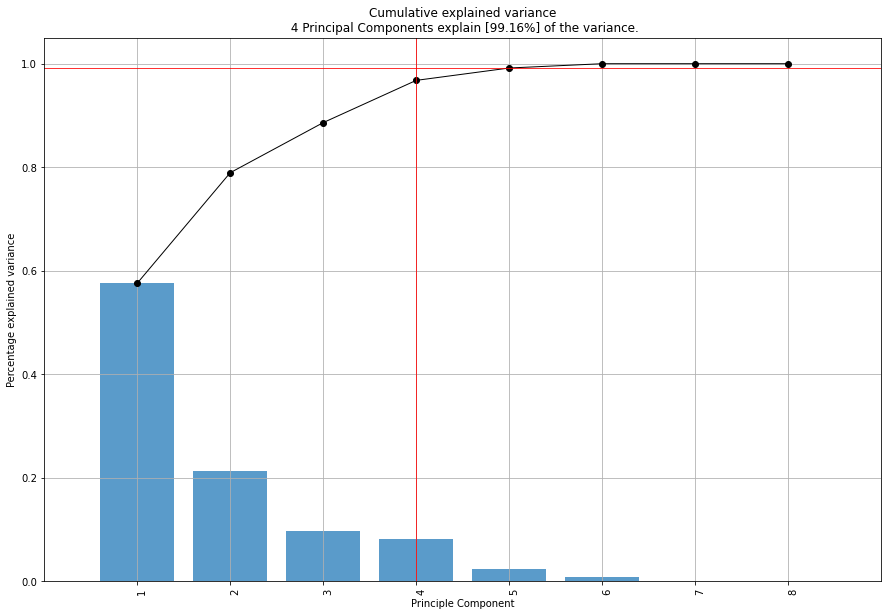

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 4 Principal Components explain [99.16%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [4]:
# plot the explained variance

model.plot()

In [5]:
# print the top features. The results show that f1 is best, followed by f2 etc

print(out['topfeat'])

     PC                         feature   loading  type
0   PC1       ches2019_multiculturalism  0.266512  best
1   PC2     ches2019_antielite_salience  0.393439  best
2   PC3      ches2019_immigrate_dissent -0.341276  best
3   PC4   ches2019_religious_principles -0.329956  best
4   PC4            ches2019_eu_position -0.167753  weak
5   PC4         ches2019_eu_position_sd  0.028705  weak
6   PC4            ches2019_eu_salience -0.182531  weak
7   PC4             ches2019_eu_dissent  0.217022  weak
8   PC4                ches2019_eu_blur  0.152357  weak
9   PC4            ches2019_eu_cohesion -0.142529  weak
10  PC4             ches2019_eu_foreign -0.155111  weak
11  PC2             ches2019_eu_intmark -0.197208  weak
12  PC4             ches2019_eu_budgets -0.159656  weak
13  PC1              ches2019_eu_asylum -0.135519  weak
14  PC1                  ches2019_lrgen  0.233276  weak
15  PC3                 ches2019_lrecon  0.228004  weak
16  PC4              ches2019_lrecon_sd -0.04020

[pca] >Plot PC1 vs PC2 with loadings.


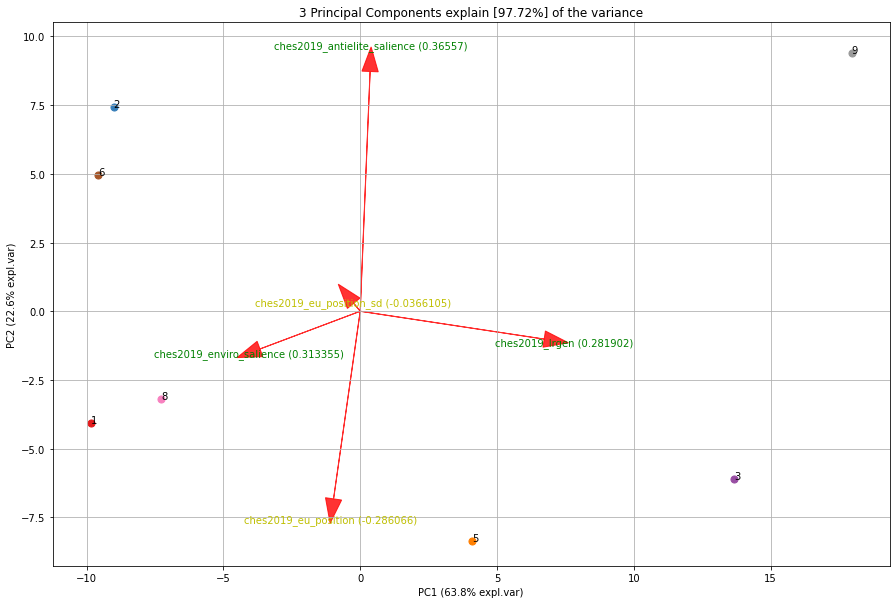

In [6]:
ax = model.biplot(n_feat = 5, legend = False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


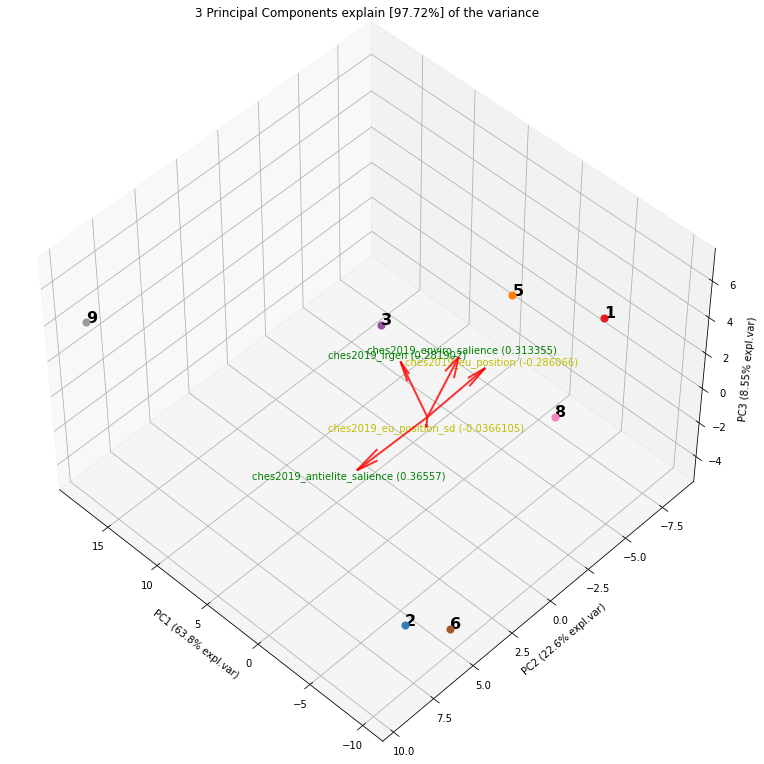

In [7]:
ax = model.biplot3d(n_feat = 5, legend=False)